# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Dfs

0.4 Preparatory work

    0.5.1 df_user_subset where each row = 1 user
    0.5.2 df_order_subset where each row = 1 order 
    0.5.3 Random sample of 30% of the data

0.5 Defining styles, formats, and commonly used variables

0.6 Exploration of data by age and family

    0.6.1 Users - total, income
    0.6.2 Items - total, avg by order
    0.6.3 Gross sales - total, avg by order
    0.6.4 Departmental totals, proportions
    0.6.5 Ordering habits - day of week, time of day, frequency


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4.1 Subset df with each row = 1 user

In [13]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [14]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [15]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False


In [16]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [17]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [18]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [19]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,1465.599976,195,13.929688,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.400024,88,7.332031,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.699997,18,3.599609,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.000000,37,9.250000,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

### 0.4.2 Subset of df where each row = 1 order

In [20]:
# Create a temporary df to use for visualizations that should be per order
# rather than per item 
df_order_subset = pd.DataFrame()

In [21]:
df_order_subset = df[['order_id', 
                     'user_id', 
                     'order_day_of_week',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'first_order_of_new_customer',
                     'max_order', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 
                     'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_order', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [22]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
1,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
2,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
3,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
4,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False


In [23]:
df_order_subset.shape

(32434489, 27)

In [24]:
# Remove duplicate rows
df_order_subset = df_order_subset.drop_duplicates()

In [25]:
# Checking new shape
df_order_subset.shape

(3214874, 27)

In [26]:
# Confirming uniqueness of order_id s
df_order_subset['order_id'].nunique()

3214874

In [27]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.600000,375.700012,59,5.898438,False,False,False,True,False
5,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,False,35.400002,375.700012,59,5.898438,False,False,False,True,False
11,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,False,28.200001,375.700012,59,5.898438,False,False,False,True,False
16,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,False,26.000000,375.700012,59,5.898438,False,False,False,True,False
21,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,False,57.000000,375.700012,59,5.898438,False,False,False,True,False


Now we have a df with just the 3,214,874 orders each on their own row

In [28]:
# Let's add the number of items in each order to this df

# First we create a temp df to hold that information
temp = pd.DataFrame(df.groupby('order_id').add_to_cart_order.max())
temp.head()

,add_to_cart_order
order_id,
2,9
3,8
4,13
5,26
6,3


In [29]:
# Merge this data with the df_order_subset

df_order_subset = df_order_subset.merge(temp, on = ['order_id'], how='left', indicator = True)

In [30]:
# Confirming that all rows got a value
df_order_subset['_merge'].value_counts()

both          3214874
left_only           0
right_only          0
Name: _merge, dtype: int64

In [31]:
# Dropping the merge field as no longer necessary
df_order_subset = df_order_subset.drop(columns = '_merge')

In [32]:
# Rename column to be more meaningful for this df
df_order_subset = df_order_subset.rename(columns = {'add_to_cart_order':'n_items_in_order'})

In [33]:
# Confirming everything looks fine
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.600000,375.700012,59,5.898438,False,False,False,True,False,5
1,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,35.400002,375.700012,59,5.898438,False,False,False,True,False,6
2,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,28.200001,375.700012,59,5.898438,False,False,False,True,False,5
3,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,26.000000,375.700012,59,5.898438,False,False,False,True,False,5
4,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,57.000000,375.700012,59,5.898438,False,False,False,True,False,8


### 0.4.4 Random sampling of 30% of data 

In [34]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [35]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [36]:
# Compare the sample dfs to the original
len(df)

32434489

In [37]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.5 Defining styles and label formats

In [38]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [39]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [40]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [41]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [42]:
# Setting up some commonly needed variables

# Calculating the gross sales for the entire df
total_gross=df['price'].sum()
total_gross

252418420.0

In [43]:
# Calculating the total items for the entire df
total_items=len(df)
total_items

32434489

In [44]:
# Calculating the total users 
total_users=len(df_user_subset)
total_users

206209

In [45]:
# Calculating the total orders 
total_orders=len(df_order_subset)
total_orders

3214874

### 0.6 Exploration of data by age and family status

In [46]:
# Getting list of profile labels
df_user_subset.fam_status.unique()

['married', 'divorced/widowed', 'single', 'living with parents and siblings']
Categories (4, object): ['divorced/widowed', 'living with parents and siblings', 'married', 'single']

In [47]:
# Identifying which profile we are investigating
profile = 'fam_status'
profile_label = 'Family Status'
labels = ['married', 'single', 'divorced/widowed', 'living with parents and siblings']
colors = ['royalblue', 'lightskyblue', 'teal', 'turquoise']
prof1 = 'married'
prof2 = 'single'
prof3 = 'divorced/widowed'
prof4 = 'living with parents and siblings'

#### Users - total, gender, income

In [48]:
user_count = pd.DataFrame(df_user_subset[profile].value_counts())
user_count

,fam_status
married,144906
single,33962
divorced/widowed,17640
living with parents and siblings,9701


In [49]:
user_percent = pd.DataFrame(user_count/total_users)
user_percent

,fam_status
married,0.70
single,0.16
divorced/widowed,0.09
living with parents and siblings,0.05


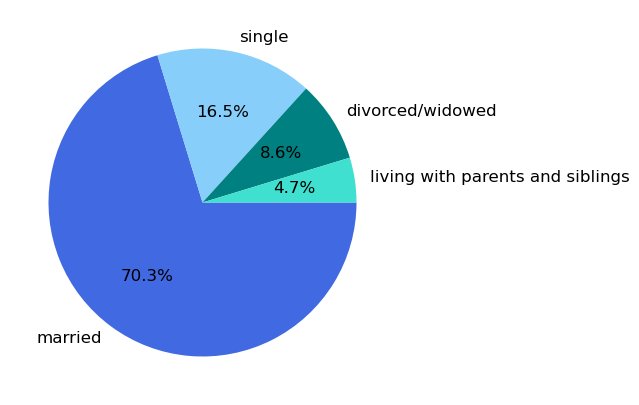

In [279]:
profile_pie = user_count.plot.pie(y=profile, 
                            figsize=(10,5), 
                            counterclock=False, 
                            colors = ['royalblue', 'lightskyblue', 'teal', 'turquoise'],
                            legend=False, 
                            labels = labels, 
                            autopct='%1.1f%%',
                            textprops={'fontsize':12})
plt.ylabel("")

plt.show()

In [281]:
# Create filename for export
filename = profile+'_pie.png'
filename

'fam_status_pie.png'

In [282]:
# Exporting bar chart
profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [53]:
# Checking the distribution of genders by profile
gender_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['gender'],
                            normalize='index')
gender_count

gender,Female,Male
fam_status,,
divorced/widowed,0.50,0.50
living with parents and siblings,0.49,0.51
married,0.50,0.50
single,0.49,0.51


In [54]:
# Checking the distribution of incomes by profile
income_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['income_group'],
                            normalize='index')
income_count

income_group,Affluent,Low income,Middle class,Upper middle class
fam_status,,,,
divorced/widowed,0.00,0.13,0.69,0.17
living with parents and siblings,0.00,0.22,0.78,0.00
married,0.00,0.16,0.72,0.12
single,0.00,0.18,0.73,0.08


In [55]:
# Checking the distribution of profile by income
prof_income_count = pd.crosstab(index=df_user_subset['income_group'],
                            columns=df_user_subset[profile],
                            normalize='index')
prof_income_count

fam_status,divorced/widowed,living with parents and siblings,married,single
income_group,,,,
Affluent,0.10,0.02,0.74,0.15
Low income,0.07,0.06,0.69,0.18
Middle class,0.08,0.05,0.70,0.17
Upper middle class,0.13,0.00,0.75,0.12


In [ ]:
# Checking distribution by age

In [48]:
# Creating two-column subset
df_5 = df_user_subset[['age', 'income']]

Text(0.5, 1.0, 'Only customers over 40 achieve the highest incomes (>$400k).\n')

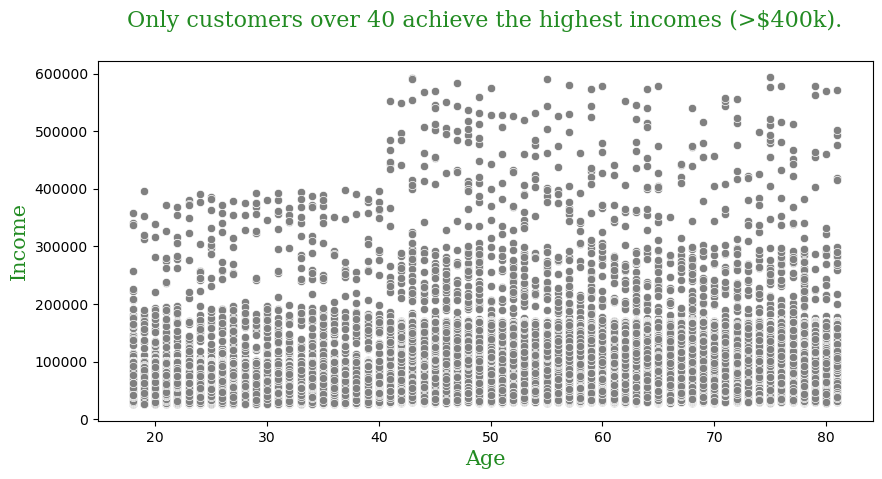

In [52]:
# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,6))

# Making a scatterplot to see if there is a relationship 
# between age and spending power
scat_age_income = sns.scatterplot(x = 'age', 
                                  y = 'income', 
                                  data = df_5, 
                                  color = 'grey')

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xlabel("Age", fontdict = font_label )

plt.ylabel("Income", fontdict = font_label )

plt.title ("Only customers over 40 achieve the highest incomes (>$400k).\n", fontdict = font_sm_title)



In [53]:
# Exporting scatterplot
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [56]:
# Checking the distribution of seniors by profile
senior_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['senior_citizen'],
                            normalize='index')
senior_count

senior_citizen,False,True
fam_status,,
divorced/widowed,0.23,0.77
living with parents and siblings,1.00,0.00
married,0.72,0.28
single,1.00,0.00


In [57]:
# Checking the distribution of profile by seniors
prof_senior_count = pd.crosstab(index=df_user_subset['senior_citizen'],
                            columns=df_user_subset[profile ],
                            normalize='index')
prof_senior_count

fam_status,divorced/widowed,living with parents and siblings,married,single
senior_citizen,,,,
False,0.03,0.06,0.69,0.22
True,0.25,0.00,0.75,0.00


.

Checking the distribution of fam_status by age

In [135]:
#Comparing age by profile
df_profile_age = pd.DataFrame(df_order_subset.groupby(profile).age.value_counts().sort_index())
df_profile_age

age
fam_status       age       
divorced/widowed 60   12060
                 61   12676
                 62   12250
                 63   13167
                 64   13107
...                     ...
single           55   13224
                 56   12143
                 57   12893
                 58   13467
                 59   13305

[128 rows x 1 columns]

In [136]:
# Rename second column to be more meaningful
df_profile_age = df_profile_age.rename(columns={'age':'age_count'})

In [137]:
# Reset the index so the column headers show up correctly
df_profile_age = df_profile_age.reset_index()

In [138]:
# Pulling each of the loyalty_flag groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

married_age = pd.DataFrame(df_profile_age[df_profile_age[profile]=='married'])
single_age = pd.DataFrame(df_profile_age[df_profile_age[profile]=='single'])
div_wid_age = pd.DataFrame(df_profile_age[df_profile_age[profile]=='divorced/widowed'])
with_fam_age = pd.DataFrame(df_profile_age[df_profile_age[profile]=='living with parents and siblings'])

In [139]:
with_fam_age

,fam_status,age,age_count
22,living with parents and siblings,18,36845
23,living with parents and siblings,19,39838
24,living with parents and siblings,20,37420
25,living with parents and siblings,21,38534


In [140]:
# Rename columns to be more desciptive
married_age.rename(columns={'age_count':'married_age_count'}, inplace=True)
single_age.rename(columns={'age_count':'single_age_count'}, inplace=True)
div_wid_age.rename(columns={'age_count':'div_wid_age_count'}, inplace=True)
with_fam_age.rename(columns={'age_count':'with_fam_age_count'}, inplace=True)

In [141]:
# Removing unnecessary columns
married_age = married_age.drop(columns = [profile])
single_age = single_age.drop(columns = [profile])
div_wid_age = div_wid_age.drop(columns = [profile])
with_fam_age = with_fam_age.drop(columns = [profile])

In [142]:
# Merge temp dfs
combo_profile_age = married_age.merge(single_age, on = 'age', how='outer')

In [143]:
combo_profile_age = combo_profile_age.merge(div_wid_age, on = 'age', how='outer')

In [144]:
combo_profile_age = combo_profile_age.merge(with_fam_age, on = 'age', how='outer')

In [145]:
combo_profile_age_sort = combo_profile_age.sort_values('age', ascending=True)
combo_profile_age_sort

,age,married_age_count,single_age_count,div_wid_age_count,with_fam_age_count
60,18,NaN,"12,163.00",NaN,"36,845.00"
61,19,NaN,"11,875.00",NaN,"39,838.00"
62,20,NaN,"12,800.00",NaN,"37,420.00"
63,21,NaN,"12,052.00",NaN,"38,534.00"
0,22,"37,688.00","13,745.00",NaN,NaN
...,...,...,...,...,...
55,77,"38,186.00",NaN,"12,030.00",NaN
56,78,"36,975.00",NaN,"12,659.00",NaN
57,79,"39,522.00",NaN,"11,979.00",NaN
58,80,"38,924.00",NaN,"12,881.00",NaN


In [146]:
# Rewrite NaNs as zeroes
combo_profile_age_final = combo_profile_age_sort.fillna(0)

In [147]:
combo_profile_age_final.head(35)

,age,married_age_count,single_age_count,div_wid_age_count,with_fam_age_count
60,18,0.00,"12,163.00",0.00,"36,845.00"
61,19,0.00,"11,875.00",0.00,"39,838.00"
62,20,0.00,"12,800.00",0.00,"37,420.00"
63,21,0.00,"12,052.00",0.00,"38,534.00"
0,22,"37,688.00","13,745.00",0.00,0.00
1,23,"38,136.00","12,637.00",0.00,0.00
2,24,"37,662.00","11,466.00",0.00,0.00
3,25,"34,391.00","12,870.00",0.00,0.00
4,26,"38,542.00","11,736.00",0.00,0.00
5,27,"36,379.00","13,656.00",0.00,0.00


In [148]:
combo_profile_age_final.tail(32)

,age,married_age_count,single_age_count,div_wid_age_count,with_fam_age_count
28,50,"37,378.00","11,022.00",0.00,0.00
29,51,"39,506.00","12,455.00",0.00,0.00
30,52,"36,941.00","13,141.00",0.00,0.00
31,53,"37,317.00","12,531.00",0.00,0.00
32,54,"38,204.00","12,495.00",0.00,0.00
33,55,"37,984.00","13,224.00",0.00,0.00
34,56,"39,725.00","12,143.00",0.00,0.00
35,57,"36,260.00","12,893.00",0.00,0.00
36,58,"35,961.00","13,467.00",0.00,0.00
37,59,"36,976.00","13,305.00",0.00,0.00


In [149]:
# Reset the index so the df graphs correctly
combo_profile_age_final = combo_profile_age_final.reset_index(drop=True)

In [150]:
combo_profile_age_final

,age,married_age_count,single_age_count,div_wid_age_count,with_fam_age_count
0,18,0.00,"12,163.00",0.00,"36,845.00"
1,19,0.00,"11,875.00",0.00,"39,838.00"
2,20,0.00,"12,800.00",0.00,"37,420.00"
3,21,0.00,"12,052.00",0.00,"38,534.00"
4,22,"37,688.00","13,745.00",0.00,0.00
...,...,...,...,...,...
59,77,"38,186.00",0.00,"12,030.00",0.00
60,78,"36,975.00",0.00,"12,659.00",0.00
61,79,"39,522.00",0.00,"11,979.00",0.00
62,80,"38,924.00",0.00,"12,881.00",0.00


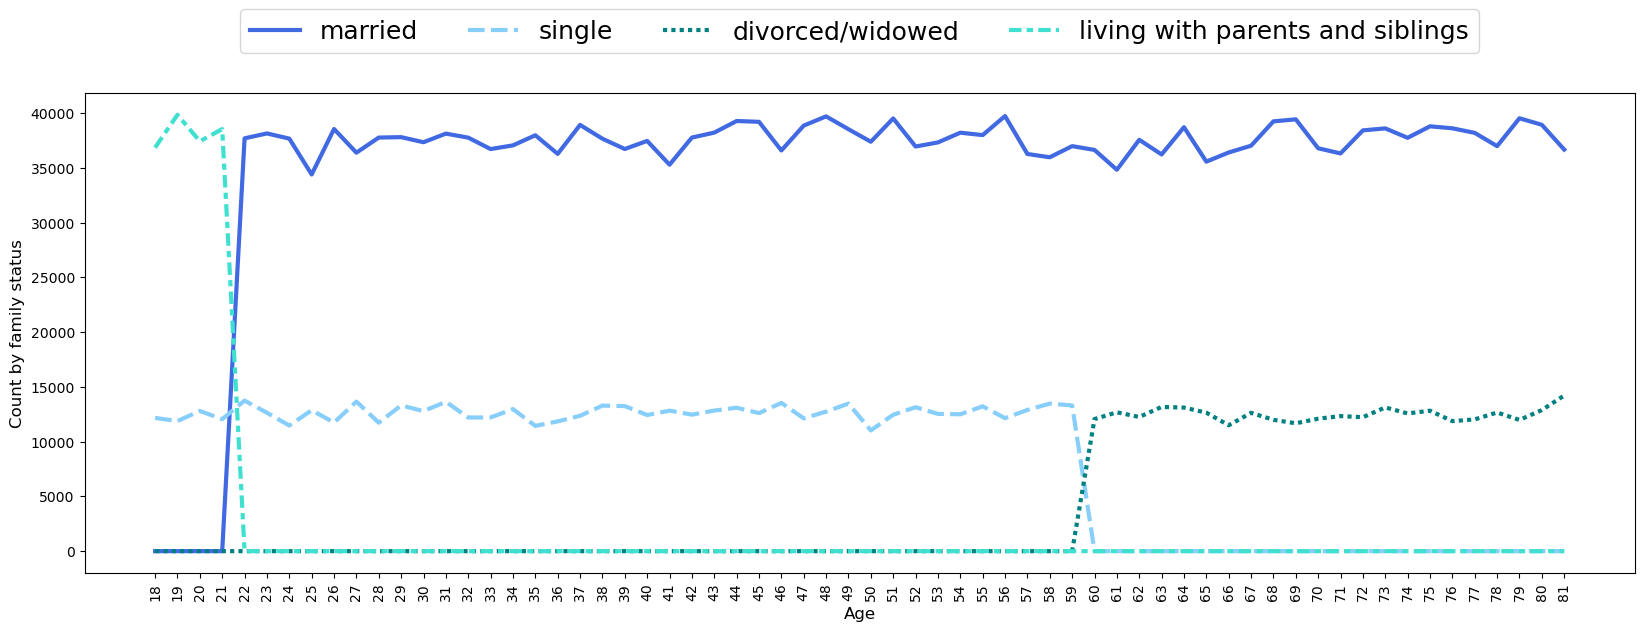

In [283]:
# Checking the distribution of fam_status by age

# Prepping variables for x-axis
age_xticks = np.arange(len(combo_profile_age_final['age']))
ages = combo_profile_age_final['age']

# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(20,8))

# Creating the plot
profile_age_line = sns.lineplot(data= combo_profile_age_final[['married_age_count', 'single_age_count', 'div_wid_age_count', 'with_fam_age_count']], 
                            dashes = True,
                            palette = colors,
                            lw = 3)

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(labels = labels, 
           loc='upper center', 
           ncol=4, 
           bbox_to_anchor=(0.5, 1.2),
           fontsize=18)

plt.xticks(age_xticks, ages, rotation=90)
plt.xlabel("Age", size = 12 )

plt.ylabel("Count by family status", size = 12 )


plt.show()

In [284]:
# Create filename for export
filename = profile+'_age_line.png'
filename

'fam_status_age_line.png'

In [285]:
# Exporting bar chart
profile_age_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

####     0.6.2 Items - total, avg by order

In [154]:
item_count = pd.DataFrame(df[profile].value_counts())
item_count

,fam_status
married,22777061
single,5330838
divorced/widowed,2774404
living with parents and siblings,1552186


In [155]:
item_percent = pd.DataFrame(item_count/total_items)
item_percent

,fam_status
married,0.70
single,0.16
divorced/widowed,0.09
living with parents and siblings,0.05


In [156]:
# Compare items per user
items_per_user = pd.DataFrame(item_count/user_count)
items_per_user

,fam_status
married,157.19
single,156.96
divorced/widowed,157.28
living with parents and siblings,160.00


In [157]:
avg_order = df_order_subset.groupby(profile).n_items_in_order.mean()
avg_order

fam_status
divorced/widowed                   10.11
living with parents and siblings   10.17
married                            10.09
single                             10.04
Name: n_items_in_order, dtype: float64

#### 0.6.3 Gross sales - total, avg by order

In [158]:
gross_by_profile = pd.DataFrame(df.groupby(profile).price.sum())
gross_by_profile

,price
fam_status,
divorced/widowed,"21,618,514.00"
living with parents and siblings,"12,093,848.00"
married,"177,256,144.00"
single,"41,449,872.00"


In [159]:
gross_percent_by_profile = gross_by_profile/total_gross
gross_percent_by_profile

,price
fam_status,
divorced/widowed,0.09
living with parents and siblings,0.05
married,0.70
single,0.16


In [160]:
avg_order_gross_by_profile = df_order_subset.groupby(profile).total_spent_in_order.mean()
avg_order_gross_by_profile

fam_status
divorced/widowed                   78.76
living with parents and siblings   79.23
married                            78.54
single                             78.09
Name: total_spent_in_order, dtype: float32

#### 0.6.4 Departmental totals, proportions

In [161]:
gross_by_profile_dept = pd.DataFrame(df.groupby([profile, 'department_id']).price.sum())
gross_by_profile_dept

price
fam_status       department_id             
divorced/widowed 1.00          1,501,178.75
                 2.00             21,132.80
                 3.00            788,823.19
                 4.00          6,504,738.00
                 5.00            101,633.50
...                                     ...
single           17.00           876,576.38
                 18.00           539,444.19
                 19.00         2,026,941.12
                 20.00         1,355,124.12
                 21.00           100,781.20

[84 rows x 1 columns]

In [162]:
# Rename column to be more desciptive
gross_by_profile_dept.rename(columns={'price':'gross_sales'}, inplace=True)

In [163]:
# Reset the index so the correct column headers will appear
gross_by_profile_dept = gross_by_profile_dept.reset_index()

In [164]:
gross_by_profile_dept

,fam_status,department_id,gross_sales
0,divorced/widowed,1.00,"1,501,178.75"
1,divorced/widowed,2.00,"21,132.80"
2,divorced/widowed,3.00,"788,823.19"
3,divorced/widowed,4.00,"6,504,738.00"
4,divorced/widowed,5.00,"101,633.50"
...,...,...,...
79,single,17.00,"876,576.38"
80,single,18.00,"539,444.19"
81,single,19.00,"2,026,941.12"
82,single,20.00,"1,355,124.12"


In [170]:
# Pulling each of the profile groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

prof1_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof1])
prof2_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof2])
prof3_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof3])
prof4_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof4])

In [172]:
# Rename columns to be more desciptive
prof1_gross_df.rename(columns={'gross_sales': prof1+'_gross'}, inplace=True)
prof2_gross_df.rename(columns={'gross_sales': prof2+'_gross'}, inplace=True)
prof3_gross_df.rename(columns={'gross_sales': prof3+'_gross'}, inplace=True)
prof4_gross_df.rename(columns={'gross_sales': prof4+'_gross'}, inplace=True)

In [173]:
# Removing unnecessary columns
prof1_gross_df = prof1_gross_df.drop(columns = [profile])
prof2_gross_df = prof2_gross_df.drop(columns = [profile])
prof3_gross_df = prof3_gross_df.drop(columns = [profile])
prof4_gross_df = prof4_gross_df.drop(columns = [profile])

In [174]:
# Merge temp dfs
combo_gross_by_flag = prof1_gross_df.merge(prof2_gross_df, on = 'department_id', how='left')

In [175]:
combo_gross_by_flag = combo_gross_by_flag.merge(prof3_gross_df, on = 'department_id', how='left')

In [176]:
combo_gross_by_flag = combo_gross_by_flag.merge(prof4_gross_df, on = 'department_id', how='left')

In [177]:
# Merge dept name to allow for easier visualizations
combo_gross_by_flag = pd.merge(combo_gross_by_flag, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [178]:
# Set the department name to be used as the index
combo_gross_by_flag = combo_gross_by_flag.set_index('department')

In [179]:
# Drop the department_id column so it doesn't interfere with visualizations
combo_gross_by_flag = combo_gross_by_flag.drop(columns = ['department_id'])

In [180]:
# Sort departments by alphabetical order for more consistent look to axes
combo_gross_by_flag_sort = combo_gross_by_flag.sort_values('department', ascending=False)

In [181]:
combo_gross_by_flag_sort

,married_gross,single_gross,divorced/widowed_gross,living with parents and siblings_gross
department,,,,
snacks,"8,679,379.00","2,026,941.12","1,053,758.12","585,459.31"
produce,"53,081,312.00","12,477,433.00","6,504,738.00","3,597,450.00"
pets,"530,656.69","130,469.70","65,195.80","44,566.20"
personal care,"2,506,746.25","588,635.00","308,837.50","168,954.00"
pantry,"10,558,627.00","2,455,848.00","1,283,128.75","723,056.88"
other,"176,570.91","42,683.00","21,132.80","13,321.30"
missing,"418,845.81","100,781.20","48,611.60","30,606.60"
meat seafood,"8,168,353.00","1,844,838.00","986,102.19","552,277.19"
international,"1,450,506.88","342,044.41","177,474.50","98,446.90"




Create a proportional table

In [182]:
# Merging the total per department to create a table of proportions/percents
# of gross sales by price_range
combo_gross_by_dept_prop = pd.merge(combo_gross_by_flag_sort, dept_data[['department', 'total_spent_in_dept']], on = ['department'], how='left')

In [183]:
# Set the department name to be used as the index
combo_gross_by_dept_prop = combo_gross_by_dept_prop.set_index('department')

In [184]:
combo_gross_by_dept_prop.head()

,married_gross,single_gross,divorced/widowed_gross,living with parents and siblings_gross,total_spent_in_dept
department,,,,,
snacks,"8,679,379.00","2,026,941.12","1,053,758.12","585,459.31","12,345,538.00"
produce,"53,081,312.00","12,477,433.00","6,504,738.00","3,597,450.00","75,660,936.00"
pets,"530,656.69","130,469.70","65,195.80","44,566.20","770,888.38"
personal care,"2,506,746.25","588,635.00","308,837.50","168,954.00","3,573,172.75"
pantry,"10,558,627.00","2,455,848.00","1,283,128.75","723,056.88","15,020,661.00"


In [185]:
# Creating proportional fields
combo_gross_by_dept_prop[prof1+'_prop'] = combo_gross_by_dept_prop[prof1+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop[prof2+'_prop'] = combo_gross_by_dept_prop[prof2+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop[prof3+'_prop'] = combo_gross_by_dept_prop[prof3+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop[prof4+'_prop'] = combo_gross_by_dept_prop[prof4+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']

In [186]:
combo_gross_by_dept_prop.head()

,married_gross,single_gross,divorced/widowed_gross,living with parents and siblings_gross,total_spent_in_dept,married_prop,single_prop,divorced/widowed_prop,living with parents and siblings_prop
department,,,,,,,,,
snacks,"8,679,379.00","2,026,941.12","1,053,758.12","585,459.31","12,345,538.00",0.70,0.16,0.09,0.05
produce,"53,081,312.00","12,477,433.00","6,504,738.00","3,597,450.00","75,660,936.00",0.70,0.16,0.09,0.05
pets,"530,656.69","130,469.70","65,195.80","44,566.20","770,888.38",0.69,0.17,0.08,0.06
personal care,"2,506,746.25","588,635.00","308,837.50","168,954.00","3,573,172.75",0.70,0.16,0.09,0.05
pantry,"10,558,627.00","2,455,848.00","1,283,128.75","723,056.88","15,020,661.00",0.70,0.16,0.09,0.05


In [187]:
# Drop the columns that are no longer needed
combo_gross_by_dept_prop = combo_gross_by_dept_prop.drop(columns = [prof1+'_gross', prof2+'_gross', prof3+'_gross', prof4+'_gross', 'total_spent_in_dept' ])


In [188]:
combo_gross_by_dept_prop

,married_prop,single_prop,divorced/widowed_prop,living with parents and siblings_prop
department,,,,
snacks,0.70,0.16,0.09,0.05
produce,0.70,0.16,0.09,0.05
pets,0.69,0.17,0.08,0.06
personal care,0.70,0.16,0.09,0.05
pantry,0.70,0.16,0.09,0.05
other,0.70,0.17,0.08,0.05
missing,0.70,0.17,0.08,0.05
meat seafood,0.71,0.16,0.09,0.05
international,0.70,0.17,0.09,0.05


#### 0.6.5 Ordering habits - day of week, time of day, frequency

In [189]:
#Comparing day of the week by profile
dow_profile = pd.DataFrame(df_order_subset.groupby(profile).order_day_of_week.value_counts().sort_index())
dow_profile

order_day_of_week
fam_status                       order_day_of_week                   
divorced/widowed                 0                              47209
                                 1                              47372
                                 2                              37547
                                 3                              35361
                                 4                              34034
                                 5                              36881
                                 6                              36075
living with parents and siblings 0                              26344
                                 1                              26575
                                 2                              20932
                                 3                              19333
                                 4                              19147
                                 5                              20332
                                 6                              19974
married                          0                             391987
                                 1                             389802
                                 2                             310583
                                 3                             289814
                                 4                             281663
                                 5                             298389
                                 6                             294727
single                           0                              92232
                                 1                              92956
                                 2                              72893
                                 3                              67892
                                 4                              66368
                                 5                              70380
                                 6                              68072

In [190]:
# Rename second column to be more meaningful
dow_profile = dow_profile.rename(columns={'order_day_of_week':'dow_count'})

In [191]:
# Reset the index so the column headers show up correctly
dow_profile = dow_profile.reset_index()

In [192]:
dow_profile

,fam_status,order_day_of_week,dow_count
0,divorced/widowed,0,47209
1,divorced/widowed,1,47372
2,divorced/widowed,2,37547
3,divorced/widowed,3,35361
4,divorced/widowed,4,34034
5,divorced/widowed,5,36881
6,divorced/widowed,6,36075
7,living with parents and siblings,0,26344
8,living with parents and siblings,1,26575
9,living with parents and siblings,2,20932


In [193]:
# Calculating the total orders by profiles
dow_profile.loc[dow_profile[profile]==prof1, 'total_orders'] = dow_profile[dow_profile[profile]==prof1].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof2, 'total_orders'] = dow_profile[dow_profile[profile]==prof2].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof3, 'total_orders'] = dow_profile[dow_profile[profile]==prof3].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof4, 'total_orders'] = dow_profile[dow_profile[profile]==prof4].dow_count.sum()

dow_profile

,fam_status,order_day_of_week,dow_count,total_orders
0,divorced/widowed,0,47209,"274,479.00"
1,divorced/widowed,1,47372,"274,479.00"
2,divorced/widowed,2,37547,"274,479.00"
3,divorced/widowed,3,35361,"274,479.00"
4,divorced/widowed,4,34034,"274,479.00"
5,divorced/widowed,5,36881,"274,479.00"
6,divorced/widowed,6,36075,"274,479.00"
7,living with parents and siblings,0,26344,"152,637.00"
8,living with parents and siblings,1,26575,"152,637.00"
9,living with parents and siblings,2,20932,"152,637.00"


In [194]:
# Calculating the percent of order by day by loyalty status
dow_profile['percent_of_total_by_flag'] = (dow_profile['dow_count']/dow_profile['total_orders'])*100
dow_profile

,fam_status,order_day_of_week,dow_count,total_orders,percent_of_total_by_flag
0,divorced/widowed,0,47209,"274,479.00",17.20
1,divorced/widowed,1,47372,"274,479.00",17.26
2,divorced/widowed,2,37547,"274,479.00",13.68
3,divorced/widowed,3,35361,"274,479.00",12.88
4,divorced/widowed,4,34034,"274,479.00",12.40
5,divorced/widowed,5,36881,"274,479.00",13.44
6,divorced/widowed,6,36075,"274,479.00",13.14
7,living with parents and siblings,0,26344,"152,637.00",17.26
8,living with parents and siblings,1,26575,"152,637.00",17.41
9,living with parents and siblings,2,20932,"152,637.00",13.71


In [197]:
# Creating three temp dfs to use for bar chart
prof1_dow_percent = dow_profile.loc[dow_profile[profile] ==prof1, ['order_day_of_week', 'percent_of_total_by_flag']]    
prof2_dow_percent = dow_profile.loc[dow_profile[profile] ==prof2, ['order_day_of_week', 'percent_of_total_by_flag']]    
prof3_dow_percent = dow_profile.loc[dow_profile[profile] ==prof3, ['order_day_of_week', 'percent_of_total_by_flag']]      
prof4_dow_percent = dow_profile.loc[dow_profile[profile] ==prof4, ['order_day_of_week', 'percent_of_total_by_flag']]      


In [198]:
# Use order_day_of_week as index
prof1_dow_percent = prof1_dow_percent.set_index('order_day_of_week')
prof2_dow_percent = prof2_dow_percent.set_index('order_day_of_week')
prof3_dow_percent = prof3_dow_percent.set_index('order_day_of_week')
prof4_dow_percent = prof4_dow_percent.set_index('order_day_of_week')

In [199]:
# Name columns to be distinctive
prof1_dow_percent = prof1_dow_percent.rename(columns={'percent_of_total_by_flag': prof1+'_dow_perc'})
prof2_dow_percent = prof2_dow_percent.rename(columns={'percent_of_total_by_flag': prof2+'_dow_perc'})
prof3_dow_percent = prof3_dow_percent.rename(columns={'percent_of_total_by_flag': prof3+'_dow_perc'})
prof4_dow_percent = prof4_dow_percent.rename(columns={'percent_of_total_by_flag': prof4+'_dow_perc'})

In [200]:
# Merge back into one df for visualization
combo_dow_percent = pd.merge(prof1_dow_percent, prof2_dow_percent, on='order_day_of_week', how='left' )

In [201]:
combo_dow_percent = pd.merge(combo_dow_percent, prof3_dow_percent, on='order_day_of_week', how='left')

In [202]:
combo_dow_percent = pd.merge(combo_dow_percent, prof4_dow_percent, on='order_day_of_week', how='left')

In [203]:
combo_dow_percent

,married_dow_perc,single_dow_perc,divorced/widowed_dow_perc,living with parents and siblings_dow_perc
order_day_of_week,,,,
0,17.37,17.38,17.20,17.26
1,17.27,17.51,17.26,17.41
2,13.76,13.73,13.68,13.71
3,12.84,12.79,12.88,12.67
4,12.48,12.50,12.40,12.54
5,13.22,13.26,13.44,13.32
6,13.06,12.82,13.14,13.09


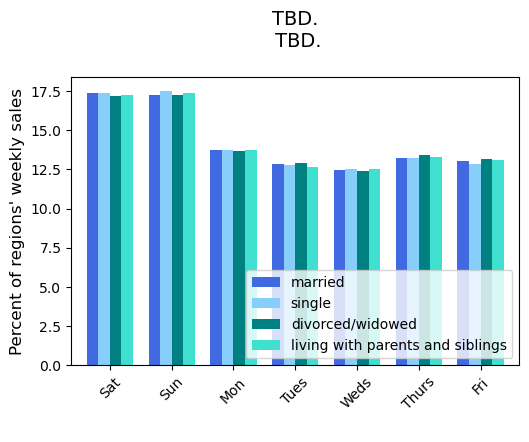

In [286]:
# Create a bar chart showing when different loyalty groups shop most often
dow_bar_by_loyalty = combo_dow_percent.plot(kind='bar', width=0.75, color = colors)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.ylabel('Percent of regions\' weekly sales', size=12)
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.legend(labels = labels, loc = 'lower right')
plt.title ("TBD.\n TBD.\n", size=14)

plt.show()

There isn't really any variation by region by day or order, so we'll look at ordering time of day


In [205]:
# Creating three-column subset of the 30% df
df_profile_sm = pd.DataFrame(df_order_subset.groupby([profile, 'order_hour_of_day']).total_spent_in_order.sum())

In [206]:
# First reset the index for manipulation of data
df_profile_sm = df_profile_sm.reset_index()

In [207]:
df_profile_sm.head()

,fam_status,order_hour_of_day,total_spent_in_order
0,divorced/widowed,0,"134,236.59"
1,divorced/widowed,1,"70,812.30"
2,divorced/widowed,2,"50,667.60"
3,divorced/widowed,3,"36,000.80"
4,divorced/widowed,4,"32,716.10"


In [208]:
# Pulling each of the loyalty_flag groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

prof1_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof1])
prof2_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof2])
prof3_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof3])
prof4_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof4])

In [209]:
# Rename columns to be more desciptive
prof1_hod.rename(columns={'total_spent_in_order': prof1+'_total_hod'}, inplace=True)
prof2_hod.rename(columns={'total_spent_in_order': prof2+'_total_hod'}, inplace=True)
prof3_hod.rename(columns={'total_spent_in_order': prof3+'_total_hod'}, inplace=True)
prof4_hod.rename(columns={'total_spent_in_order': prof4+'_total_hod'}, inplace=True)

In [210]:
# Removing unnecessary columns
prof1_hod = prof1_hod.drop(columns = [profile])
prof2_hod = prof2_hod.drop(columns = [profile])
prof3_hod = prof3_hod.drop(columns = [profile])
prof4_hod = prof4_hod.drop(columns = [profile])

In [211]:
# Merge temp dfs
combo_profile_hod = prof1_hod.merge(prof2_hod, on = 'order_hour_of_day', how='left')

In [212]:
combo_profile_hod = combo_profile_hod.merge(prof3_hod, on = 'order_hour_of_day', how='left')

In [213]:
combo_profile_hod = combo_profile_hod.merge(prof4_hod, on = 'order_hour_of_day', how='left')

In [214]:
# Set the department name to be used as the index
combo_profile_hod = combo_profile_hod.set_index('order_hour_of_day')

In [215]:
combo_profile_hod.shape

(24, 4)

In [216]:
combo_profile_hod.head()

,married_total_hod,single_total_hod,divorced/widowed_total_hod,living with parents and siblings_total_hod
order_hour_of_day,,,,
0,"1,199,215.62","288,951.09","134,236.59","86,183.30"
1,"636,075.81","149,598.59","70,812.30","46,487.30"
2,"375,569.09","85,622.60","50,667.60","29,080.50"
3,"278,921.31","66,086.30","36,000.80","20,322.70"
4,"293,799.69","67,179.40","32,716.10","23,556.30"


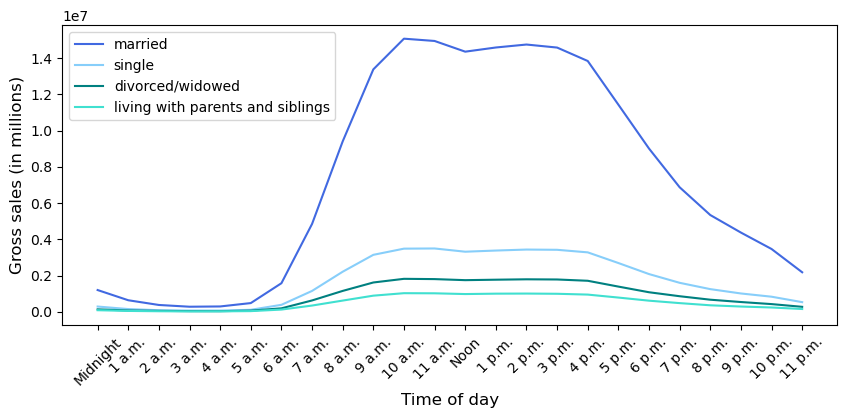

In [287]:

# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,5))

# Creating the plot
profile_hod_line = sns.lineplot(data= combo_profile_hod[[prof1+'_total_hod', prof2+'_total_hod', prof3+'_total_hod', prof4+'_total_hod']], 
                            palette= colors, 
                            dashes = False )

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(labels = labels, 
           loc='upper left', ncol=1)
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of day", size = 12 )

plt.ylabel("Gross sales (in millions)", size = 12 )

#plt.title ("TBD.", size=16)

plt.show()

In [288]:
# Create filename for export
filename = profile+'_gross_hod.png'

In [289]:
filename

'fam_status_gross_hod.png'

In [290]:
# Exporting bar chart
profile_hod_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

Compare profile with frequency of shopping

In [221]:
# Create a cross tabulation to show the proportions of the 
# loyalty groups in each frequent_shopper category
cross_tab_profile_freq = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')
cross_tab_profile_freq

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
fam_status,,,
divorced/widowed,0.42,0.27,0.31
living with parents and siblings,0.42,0.28,0.30
married,0.41,0.28,0.31
single,0.41,0.27,0.31


In [ ]:
Compare profile with loyalty_flag

In [291]:
# Create a cross tabulation to show the proportions of the 
# profile in each category
cross_tab_profile_loy = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['loyalty_flag'],
                            normalize='index')
cross_tab_profile_loy

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,0.08,0.54,0.37
living with parents and siblings,0.08,0.54,0.37
married,0.08,0.54,0.37
single,0.08,0.55,0.37


In [292]:
# Create a cross tabulation to show the proportions of the 
# each category in each profile
cross_tab_profile_loy = pd.crosstab(index=df_user_subset['loyalty_flag'],
                            columns=df_user_subset[profile],
                            normalize='index')
cross_tab_profile_loy

fam_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,0.09,0.05,0.70,0.17
New customer,0.09,0.05,0.70,0.17
Regular customer,0.09,0.05,0.70,0.16
